In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
gray = cv2.cvtColor(cv2.imread("lenna.png"), cv2.COLOR_BGR2GRAY)

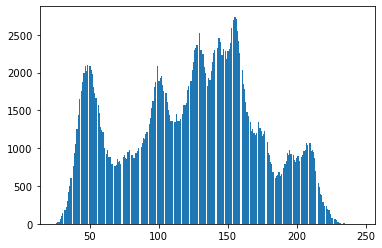

In [4]:
plt.figure()
plt.hist(gray.flatten(), 256)
plt.show()

In [5]:
high, wide = gray.shape[:2]

In [6]:
# 统计像素出现次数
histogram = {}
for x in range(high):
    for y in range(wide):
        gray_val = gray[x, y]
        if gray_val in histogram:
            histogram[gray_val] += 1
        else:
            histogram[gray_val] = 1

In [7]:
sorted_histogram = {}

In [8]:
# 对像素值进行排序
sorted_gray_val = sorted(histogram)

In [9]:
# 按照升序的像数值对整个字典重排
for gray_val in sorted_gray_val:
    sorted_histogram[gray_val] = histogram[gray_val]

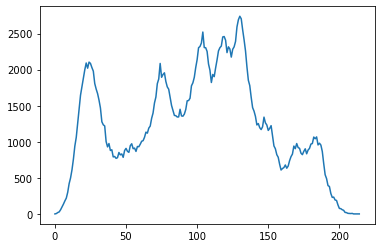

In [10]:
plt.figure()
plt.plot(sorted_histogram.values())
plt.show()

均衡化

In [11]:
probility = {} # 用于统计像素出现的概率

In [12]:
for i in sorted_histogram.keys():
    probility[i] = sorted_histogram[i] / (wide*high)

In [13]:
# 将像素分布到 0-255
temp = 0
for pixel in probility.keys():
    temp += probility[pixel]
    probility[pixel] = temp * 255

In [14]:
new_img = np.zeros((wide, high), gray.dtype)

In [15]:
for x in range(high):
    for y in range(wide):
        new_img[x, y] = probility[gray[x, y]]

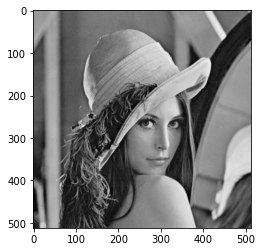

In [16]:
plt.figure()
plt.imshow(gray, cmap="gray")
plt.show()

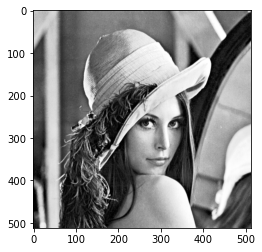

In [17]:
plt.figure()
plt.imshow(new_img, cmap="gray")
plt.show()

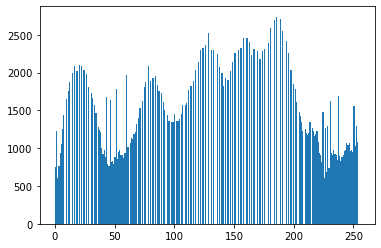

In [18]:
plt.figure()
plt.hist(new_img.flatten(), 256)
plt.show()